# Naive Bayes

## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model).

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, flatten each image to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
>```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```

to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
  ```



In [205]:
# your code
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$

#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
The classification rule is in the code cell below.

\hat{y}=argmax_{x}\begin{bmatrix}ln(p(y_{k})+\sum_{i=1}^{D}ln(p)x_{i}y_{k}\end{bmatrix}

@ TO-DO:  parameters estimation

In [204]:
from IPython.display import Latex
from IPython.display import Math

display(Math(r'\hat{y}=argmax_{x}\begin{bmatrix}p(y_{k})\end{bmatrix}\prod_{i=1}^{D}p(x_{i}|y_{k})'))
display(Math(r'\hat{y}=argmax_{x}\begin{bmatrix}ln(p(y_{k})+\sum_{i=1}^{D}ln(p)x_{i}y_{k}\end{bmatrix}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
### 1) Plot is below
### 2) Confusion matrix
We have Accuracy value of 84% which means that identification of 1.6 of every 10 digits is incorrect, and 8.4 is correct.
### 3) Optimize binarization threshold
We can try to change the "binarize" argument to value higher than 0   and  check the accuracy value.  Run this test several times and select the optimal binarize value for highest accuracy - it will be out threshold.

In [206]:
# code goes here
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
clf = BernoulliNB(binarize = 0.0)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
pred

array([7, 2, 1, ..., 9, 8, 6], dtype=uint8)

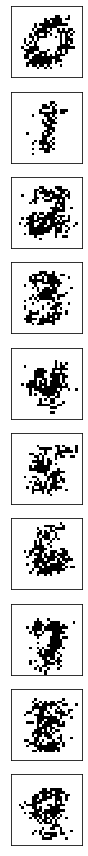

In [186]:
#mean image of each class
def example_as_pixel_matrix(example):
    return np.reshape(example, (-1, 28))

def add_example_to_figure(example, 
                     figure, 
                     subplot_rows, 
                     subplot_cols, 
                     subplot_number):
    matrix = example_as_pixel_matrix(example)

    subplot = figure.add_subplot(subplot_rows, subplot_cols, subplot_number)
    subplot.imshow(matrix, cmap='Greys', interpolation='Nearest')
    # disable tick marks
    subplot.set_xticks(np.array([]))
    subplot.set_yticks(np.array([]))

def generate_example(log_probabilities):
    pixels = [
        1.0 if np.random.rand() <= np.exp( log_probability ) else 0.0
        for log_probability in log_probabilities
    ]

    return pixels

def plot_examples(examples):
    
    figure = plt.figure(figsize=(24, 12))
    
    shape = np.shape(examples)
    rows = shape[0]
    columns = shape[1]
    
    subplot_index = 1
    
    for digit, examples_for_digit in enumerate(examples):
        for example_index, example in enumerate(examples_for_digit):
            add_example_to_figure(example, 
                                  figure, 
                                  rows, 
                                  columns, 
                                  subplot_index
                                 )
            subplot_index = subplot_index + 1
    
    figure.tight_layout()
    plt.show()


clf_NB = BernoulliNB().fit(x_train, y_train)

per_digit_log_probabilities = clf_NB.feature_log_prob_

examples = [
    [ 
        generate_example(per_digit_log_probabilities[digit])
    ]
    for digit in range(10)
]
plot_examples(examples)


              precision    recall  f1-score   support

           0       0.91      0.91      0.91       980
           1       0.90      0.96      0.93      1135
           2       0.89      0.83      0.86      1032
           3       0.76      0.84      0.80      1010
           4       0.83      0.81      0.82       982
           5       0.82      0.70      0.76       892
           6       0.89      0.89      0.89       958
           7       0.93      0.85      0.89      1028
           8       0.75      0.78      0.77       974
           9       0.75      0.84      0.79      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



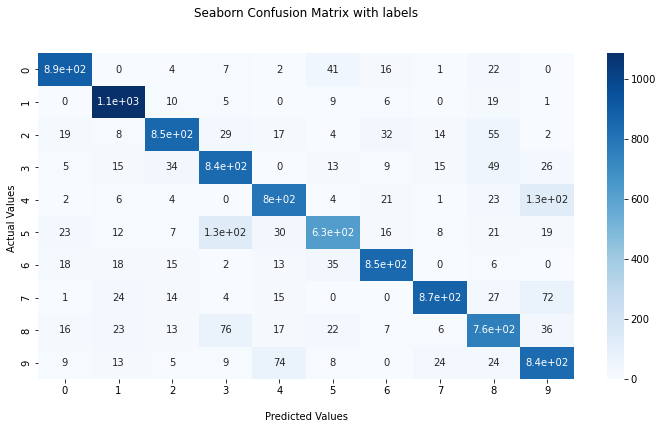

In [177]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, pred)

# print(cf_matrix)

print(metrics.classification_report(y_test, pred))

plt.figure(figsize=(12, 6))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.


* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* Write a class `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`. If there are differences try to think why
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).

### Optional: Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words. 

Bonus: How can you correct the analyzed error? 

To read more about model interpretation, see the blogpost below and my tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

In [ ]:
import string
def print_txt(txt, hot, cold):
    """
    print the text, coloring hot and cold words with colors
    """
    cold_color='\x1b[41;37m{}\x1b[0m'
    hot_color='\x1b[42;37m{}\x1b[0m'
    def color(token):
        lower = str(token).lower()
        lower = lower.replace('\t','').replace('\n','')
        lower = lower.translate(string.punctuation)
        if (lower in hot) and (lower in cold):
            return mid_color.format(token)
        elif lower in hot:
            return hot_color.format(token)
        elif lower in cold:
            return cold_color.format(token)
        else:
            return token
    colored_txt = " ".join([color(token) for token in txt.split(' ')])
    print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

In [148]:
from sklearn.base import BaseEstimator, ClassifierMixin

class NaiveBayes(BaseEstimator, ClassifierMixin):
    def fit(self, x, y):
        self.N_docs = y.size
        self.classes, self.class_sizes = np.unique(y, return_counts=True,)
        self.class_priors = self.class_sizes/self.N_docs
        self.class_log_prior_ = np.log(self.class_priors)
        self.class_vectors = np.array([x[y == p] for p in self.classes])
        self.term_freq_ = np.sum(x, axis=0) + x.shape[1] # sum of a word occurance for all articles + the total dict
        self.class_term_freq_ = np.array([np.sum(class_vector.toarray(), axis=0) + 1 
                                              for class_vector in self.class_vectors])
        self.feature_term_prob_ = self.class_term_freq_/self.term_freq_
        self.feature_log_prob_ = np.log(self.feature_term_prob_).copy()
    def _predict_log_proba(self, x):
        return self.class_log_prior_ + np.array(x * self.feature_log_prob.T)
    def predict(self, x):
        return np.argmax(self.class_log_prior_ + np.array(x * self.feature_log_prob_.T), axis=1)
    
    def predict_proba(self, X):
        return np.exp(self._predict_log_proba(X))

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB

# groups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))
train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))
test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))



In [158]:
# import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# !pip install textblob
from textblob import TextBlob

# e1,e2=check_X_y(np.array(train.data), np.array(train.data))

# type(np.array(train.data))

# train.data
# type(vectors_train)
def split_into_lemmas(message):
    message = message.encode('utf8').decode().lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]


In [217]:
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfTransformer


stop = stopwords.words('english')

count_vectorizer = CountVectorizer(stop_words=stop)
# count_vectorizer = CountVectorizer(stop_words=stop, analyzer=split_into_lemmas)#, binary=False, max_df=0.7) # analyzer=

# X_train_counts = count_vectorizer.fit_transform(train.data)
# X_test_counts = count_vectorizer.fit_transform(test.data)
# TF-IDF vectorize.
# tfidf_transformer = TfidfTransformer()
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)


est_my_bayes=NaiveBayes()
model_my_bayes = make_pipeline(count_vectorizer, est_my_bayes)
model_my_bayes.fit(train.data, train.target)
vectors_train = count_vectorizer.transform(train.data)
pred_my_bayes = model_my_bayes.predict(test.data)
print("My Naive Bayes Accuracy score is", accuracy_score(test.target, pred_my_bayes))
# print("My Naive Bayes Classification report: \n", metrics.classification_report(test.target, pred_my_bayes))


est_MNB=MultinomialNB()
model_MNB = make_pipeline(count_vectorizer, est_MNB)
model_MNB.fit(train.data, train.target)
pred_MNB = model_MNB.predict(test.data)
print("MNB Accuracy score is", accuracy_score(test.target, pred_MNB))
# print("MNB Classification report: \n", metrics.classification_report(test.target, pred_MNB))

My Naive Bayes Accuracy score is 0.5367764206054169
MNB Accuracy score is 0.6287838555496548


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim, cv, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 8)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

<Figure size 432x288 with 0 Axes>

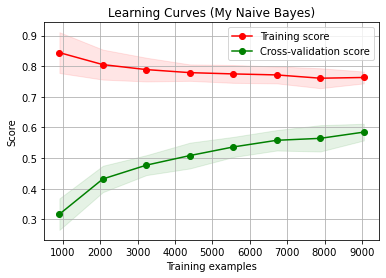

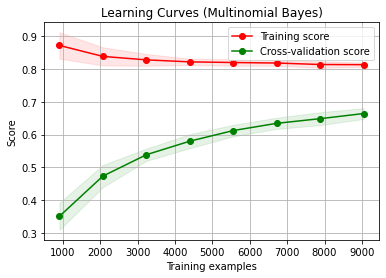

In [152]:
from sklearn.model_selection import cross_val_score

fig = plt.figure()
title = "Learning Curves (My Naive Bayes)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(est_my_bayes, title, vectors_train, train.target, ylim=(0.7, 1.01), cv=cv, n_jobs=1)
plt.show()

title = "Learning Curves (Multinomial Bayes)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(est_MNB, title, vectors_train, train.target, ylim=(0.7, 1.01), cv=cv, n_jobs=1)
plt.show()

### Answer:
There is a large gap between training and validation score. Training score is larger than the validation score. Therefore our model suffers from high variance (overfitting).

@ TO-DO:  parameters estimation - optimize performance